In [1]:
import feature_creator as fc
import pandas as pd
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,cross_val_score
from sklearn.base import clone
import numpy as np
from copy import copy

In [2]:
df = pd.read_csv('spambase.csv')
X = df.drop(columns=['spam']).to_numpy()
y = df['spam'].to_numpy()

In [3]:
model =  XGBClassifier()
feature_model = XGBClassifier()

In [4]:
#Baseline
scores = cross_val_score(model, X, y, cv=10, scoring='f1')
np.mean(scores)

0.9291562963145171

In [5]:
feature_models, ga_fitness = fc.feature_creator(model,feature_model,X,y,n_features=2,batch_size=0.03)

In [6]:
import matplotlib.pyplot as plt

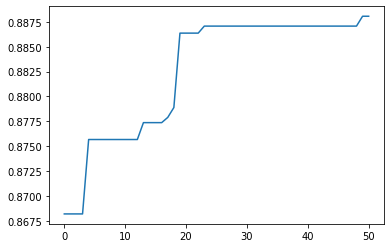

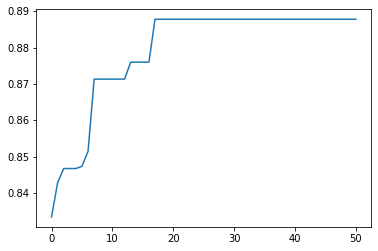

In [7]:
for data in ga_fitness:
    plt.plot(data)
    plt.show()

In [14]:
(np.array([fc.get_feature_values(feature_models[0],X)])).T

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [16]:
new_X = copy(X)
feature_values = np.ndarray((len(y),1))
for f in feature_models:
    new_X = np.hstack((new_X,np.array([fc.get_feature_values(f,X)]).T))
    

In [17]:
model =  XGBClassifier()
scores = cross_val_score(model, X, y, cv=10, scoring='f1')
np.mean(scores)

0.9291562963145171

In [18]:
model =  XGBClassifier()
scores = cross_val_score(model, new_X, y, cv=10, scoring='f1')
np.mean(scores)

0.9282927430434341